In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=100, random_state=123)

In [27]:
X.shape

(100, 2)

In [20]:
X[y==0][:10]

array([[ 0.8713187 ,  0.49071755],
       [-0.22252093,  0.97492791],
       [ 1.        ,  0.        ],
       [ 0.94905575,  0.31510822],
       [ 0.96729486,  0.25365458],
       [ 0.09602303,  0.99537911],
       [ 0.03205158,  0.99948622],
       [-0.90096887,  0.43388374],
       [-0.76144596,  0.6482284 ],
       [-0.6234898 ,  0.78183148]])

In [18]:
X[y==0,0][:5]

array([ 0.8713187 , -0.22252093,  1.        ,  0.94905575,  0.96729486])

In [19]:
#similar to X[:, 0], however in this case, instead of all rows
#here we are only selectively choosing rows where the condition y==0 is True
#and since X[y==0, 0]
#Then, it's going to be all rows that satisfy the condition from the first column

X[y==0,0] 

array([ 0.8713187 , -0.22252093,  1.        ,  0.94905575,  0.96729486,
        0.09602303,  0.03205158, -0.90096887, -0.76144596, -0.6234898 ,
        0.34536505, -0.28452759, -0.40478334,  0.8380881 , -0.8713187 ,
        0.22252093, -0.51839257,  0.71834935,  0.28452759, -0.71834935,
        0.99794539,  0.76144596,  0.6234898 ,  0.51839257, -0.09602303,
       -0.96729486,  0.92691676, -0.34536505, -0.94905575, -0.92691676,
        0.57211666,  0.40478334,  0.67230089,  0.1595999 ,  0.80141362,
        0.98155916, -0.8380881 , -0.57211666, -0.1595999 ,  0.90096887,
       -0.99794539, -0.80141362,  0.99179001, -1.        , -0.67230089,
       -0.03205158, -0.98155916, -0.46253829, -0.99179001,  0.46253829])

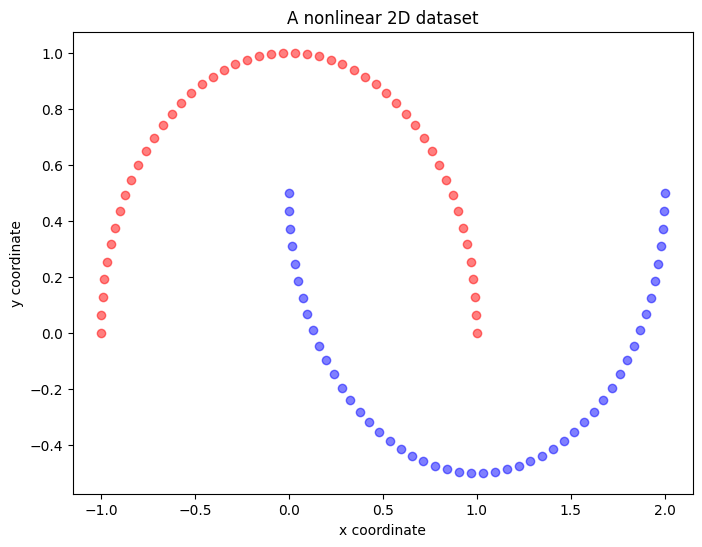

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0,1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1,1], c='b', alpha=0.5)

plt.title('A nonlinear 2D dataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

In [25]:
from sklearn.decomposition import PCA

In [26]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

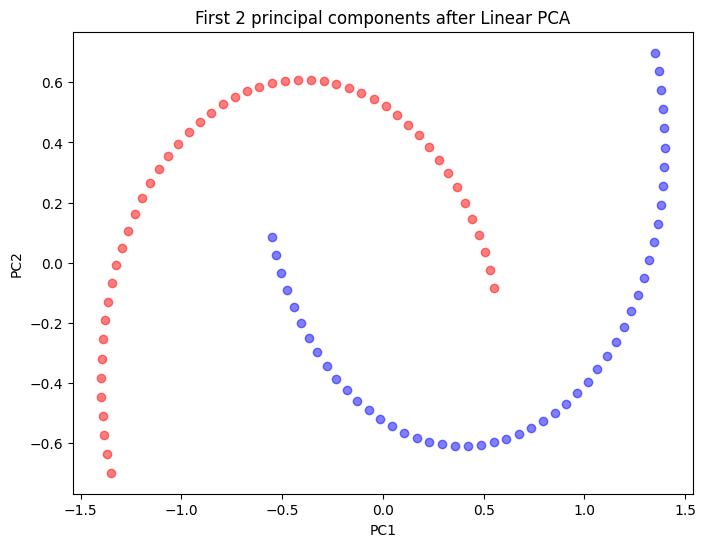

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], c='r', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], c='b', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

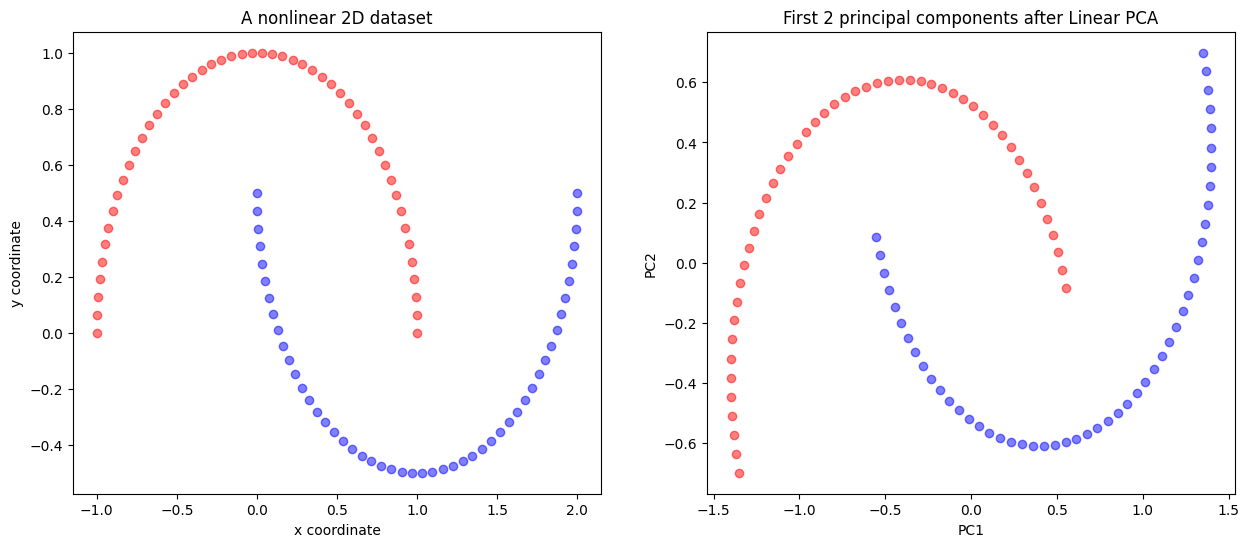

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(X[y==0, 0], X[y==0,1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1,1], c='b', alpha=0.5)

plt.title('A nonlinear 2D dataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')


plt.subplot(1,2,2)
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], c='r', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], c='b', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

## As can be seen above, the shape looks fairly similar but not exactly identical. For example we could see the visualization for the transformed data noticably shifted in y location. Furthermore, we could also see the shape has also changed slightly, from half circle to a shape that's not exactly half circles

In [35]:
import numpy as np

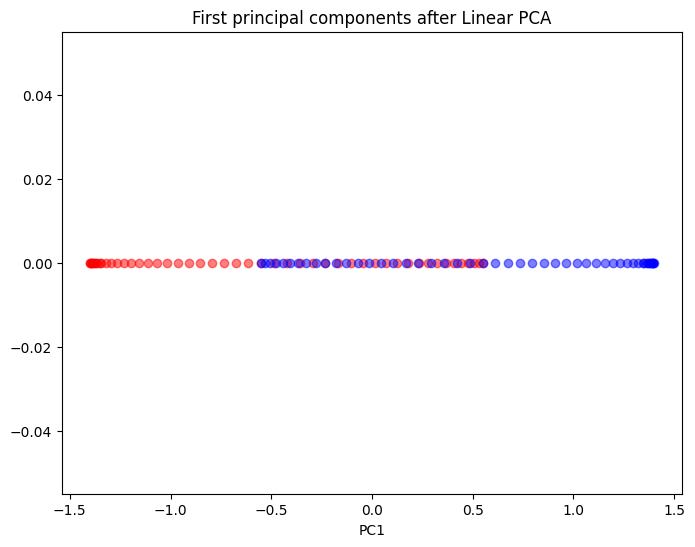

In [42]:
scikit_pca = PCA(n_components=1)
X_spca=scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), c='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), c='b', alpha=0.5)

plt.title('First principal components after Linear PCA')
plt.xlabel('PC1')

plt.show()



In [65]:
!pip install scipy==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 43.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [122 lines of output]
      <string>:114: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
      <string>:377: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
      <string>:468: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present

In [67]:
import scipy
print(scipy.__version__)

1.14.1


In [72]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
# from scipy.special import exp
# from math import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M), and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.
    
    """

    # Calculating the squared Euclidian distances for every pair of points
    # in the MxN dimensional dataset.
    # sq_dists = pdist(X, 'sqeuclidean')
    sq_dists = pdist(X, 'sqeuclidean')

    #Converting the pairwise distances into a symmetric MxM matrix.
    # mat_sq_dists = squareform(sq_dists)
    mat_sq_dists = squareform(sq_dists)

    #Computing the MxM kernel matrix.
    # K = exp(-gamma * mat_sq_dists)
    K = exp(-gamma * mat_sq_dists)

    #Centering the symmetric NxN kernel matrix.
    # N = K.shape[0]
    # one_n = np.ones((N,N))/N
    # K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    #Obtaining eigenvalues in descending order with corresponding
    #eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    #Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    
    # X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    #Need to modify to this if using np.exp
    X_pc = np.column_stack([eigvecs[:, -i] for i in range(1, n_components+1)])


    return X_pc




In [73]:
X_pc = stepwise_kpca(X, gamma=15, n_components=2)

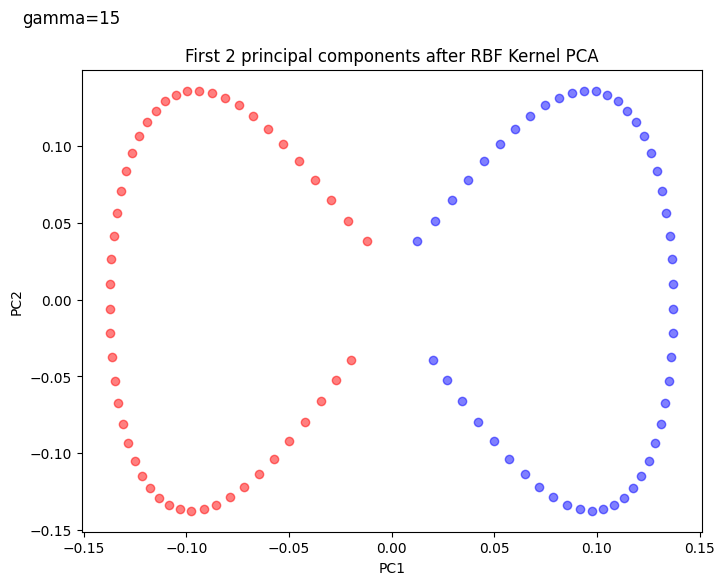

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], c='r', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], c='b', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma=15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

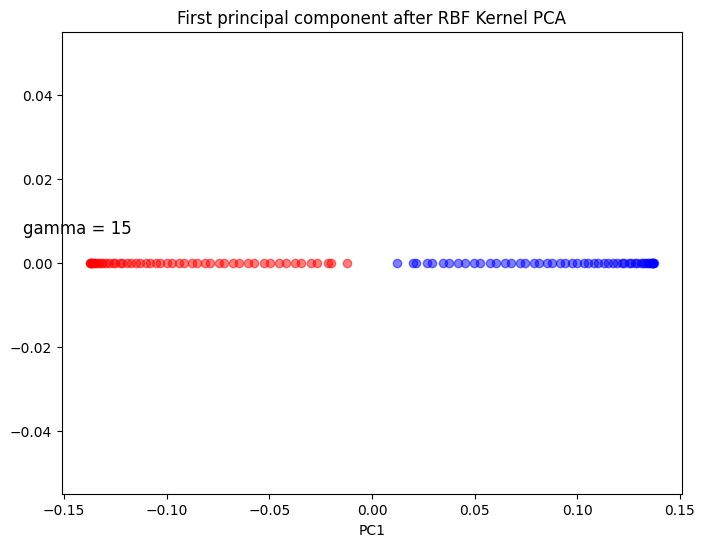

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), c='r', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), c='b', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.17, 0.007, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.show()

In [81]:
from sklearn.decomposition import KernelPCA

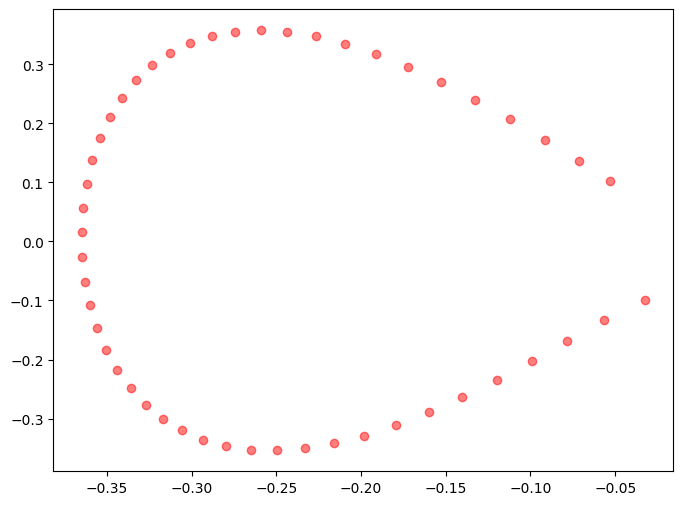

In [83]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], c='r', alpha=0.5)